Подключение к диску

In [ ]:
#источник кода для JADER алгоритма https://github.com/gbeckers/jadeR/blob/master/jadeR.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Импорт библиотек

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
from skimage import io
import pandas as pd

Создание функции для сжатия изображения

In [ ]:
def resize(image, scale) -> np.ndarray:
    """ Resize an image maintaining its proportions
    Args:
        fp (str): Path argument to image file
        scale (Union[float, int]): Percent as whole number of original image. eg. 53
    Returns:
        image (np.ndarray): Scaled image
    """    
    _scale = lambda dim, s: int(dim * s / 100)
    '''im: np.ndarray = cv2.imread(image)'''
    im = image
    height, width = im.shape
    new_width: int = _scale(width, scale)
    new_height: int = _scale(height, scale)
    new_dim: tuple = (new_width, new_height)
    return cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_AREA)

In [ ]:
experiment = '7d_after_PT-RHL_60mkA-m4'
dir_of_experiment = '/content/drive/MyDrive/WFI_data/PT_2022/7d_after_PT/RHL_60mkA/m4/RHL_60mkA'
dir_for_result = '/content/drive/MyDrive/WFI_data/PT_2022/PCA_ICA_Results'

# Создание 3ёх мерного массива


In [ ]:
path_for_frames = os.listdir(dir_of_experiment)
print(path_for_frames)

['Image_7809_220804-154919.bmp', 'Image_7813_220804-154919.bmp', 'Image_7819_220804-154919.bmp', 'Image_7805_220804-154919.bmp', 'Image_7792_220804-154919.bmp', 'Image_7804_220804-154919.bmp', 'Image_7799_220804-154919.bmp', 'Image_7811_220804-154919.bmp', 'Image_7814_220804-154919.bmp', 'Image_7798_220804-154919.bmp', 'Image_7789_220804-154919.bmp', 'Image_7795_220804-154919.bmp', 'Image_7820_220804-154919.bmp', 'Image_7822_220804-154919.bmp', 'Image_7808_220804-154919.bmp', 'Image_7827_220804-154919.bmp', 'Image_7791_220804-154919.bmp', 'Image_7821_220804-154919.bmp', 'Image_7823_220804-154919.bmp', 'Image_7818_220804-154919.bmp', 'Image_7825_220804-154919.bmp', 'Image_7802_220804-154919.bmp', 'Image_7816_220804-154919.bmp', 'Image_7806_220804-154919.bmp', 'Image_7826_220804-154919.bmp', 'Image_7796_220804-154919.bmp', 'Image_7794_220804-154919.bmp', 'Image_7824_220804-154919.bmp', 'Image_7852_220804-154920.bmp', 'Image_7842_220804-154920.bmp', 'Image_7834_220804-154920.bmp', 'Image_

In [ ]:
path_for_frames_470 = [frame for frame in path_for_frames if int(frame.split('_')[1])%2==0]
path_for_frames_505 = [frame for frame in path_for_frames if int(frame.split('_')[1])%2!=0]
print(f'Количество изображений длины волны 470 нм равно {len(path_for_frames_470)}\n Количество изображений длины волны 505 нм равно {len(path_for_frames_505)}')

Количество изображений длины волны 470 нм равно 4400
 Количество изображений длины волны 505 нм равно 4400


In [ ]:
new_list = []
for i in path_for_frames_470:
  print(i)
  if i in new_list:
    print("Here")
    
  new_list.append(i)

Image_7792_220804-154919.bmp
Image_7804_220804-154919.bmp
Image_7814_220804-154919.bmp
Image_7798_220804-154919.bmp
Image_7820_220804-154919.bmp
Image_7822_220804-154919.bmp
Image_7808_220804-154919.bmp
Image_7818_220804-154919.bmp
Image_7802_220804-154919.bmp
Image_7816_220804-154919.bmp
Image_7806_220804-154919.bmp
Image_7826_220804-154919.bmp
Image_7796_220804-154919.bmp
Image_7794_220804-154919.bmp
Image_7824_220804-154919.bmp
Image_7852_220804-154920.bmp
Image_7842_220804-154920.bmp
Image_7834_220804-154920.bmp
Image_7838_220804-154920.bmp
Image_7864_220804-154920.bmp
Image_7830_220804-154920.bmp
Image_7850_220804-154920.bmp
Image_7860_220804-154920.bmp
Image_7846_220804-154920.bmp
Image_7844_220804-154920.bmp
Image_7848_220804-154920.bmp
Image_7854_220804-154920.bmp
Image_7862_220804-154920.bmp
Image_7866_220804-154920.bmp
Image_7836_220804-154920.bmp
Image_7840_220804-154920.bmp
Image_7856_220804-154920.bmp
Image_7828_220804-154920.bmp
Image_7858_220804-154920.bmp
Image_7832_220

In [ ]:
path_for_frames_470.remove('Image_6232_220726-205301 (1).bmp')
path_for_frames_470.remove('Image_6236_220726-205301 (1).bmp')
path_for_frames_470.remove('Image_6240_220726-205301 (1).bmp')

In [ ]:
path_for_frames_505.remove('Image_6233_220726-205301 (1).bmp')
path_for_frames_505.remove('Image_6235_220726-205301 (1).bmp')
path_for_frames_505.remove('Image_6239_220726-205301 (1).bmp')

In [ ]:
print(f'Количество изображений длины волны 470 нм равно {len(path_for_frames_470)}\n Количество изображений длины волны 505 нм равно {len(path_for_frames_505)}')

Количество изображений длины волны 470 нм равно 4400
 Количество изображений длины волны 505 нм равно 4400


Создадим функцию для сортировки изображений от 1-ого к 4400-му

In [ ]:
def sortByNumberofFrame(nameofFrame):
        return int(nameofFrame.split('_')[1])
path_for_frames_470.sort(key = sortByNumberofFrame)
path_for_frames_505.sort(key = sortByNumberofFrame)

In [ ]:
os.chdir(dir_of_experiment)

In [ ]:
os.getcwd() 

'/content/drive/MyDrive/WFI_data/PT_2022/7d_after_PT/RHL_60mkA/m4/RHL_60mkA'

Сжимаю изображения в 4 раза, для ускорения работы алгоритма

In [ ]:
brain_Ca_images = np.asarray([resize(io.imread(p),25) for p in path_for_frames_470])
brain_Hem_images = np.asarray([resize(io.imread(p),25) for p in path_for_frames_505])

In [ ]:
brain_Ca_images[1].shape


(64, 87)

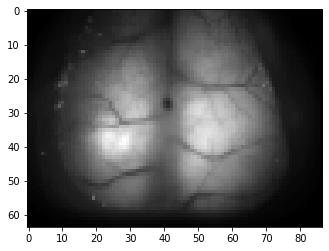

In [ ]:
plt.imshow(brain_Ca_images[200], cmap='gray')

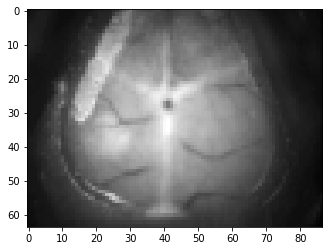

In [ ]:
plt.imshow(brain_Hem_images[200], cmap='gray')

# 3D в 2D

In [ ]:
print(brain_Ca_images.shape)
flatten_brain_Ca_images = np.reshape(brain_Ca_images,(brain_Ca_images.shape[0],brain_Ca_images.shape[1]*brain_Ca_images.shape[2]))
print(flatten_brain_Ca_images.shape)

(4400, 64, 87)
(4400, 5568)


In [ ]:
print(brain_Hem_images.shape)
flatten_brain_Hem_images = np.reshape(brain_Hem_images,(brain_Hem_images.shape[0],brain_Hem_images.shape[1]*brain_Hem_images.shape[2]))
print(flatten_brain_Hem_images.shape)

(4400, 64, 87)
(4400, 5568)


# Создание dataframes

In [ ]:
flatten_brain_Ca_images = flatten_brain_Ca_images.astype('float64', copy=False)
flatten_brain_Hem_images = flatten_brain_Hem_images.astype('float64', copy=False)

In [ ]:
names_of_pixels = []
for raw in range(1, brain_Ca_images.shape[1]+1):
    for col in range(1, brain_Ca_images.shape[2]+1):
        name_of_this_pixel = 'r'+ str(raw) + 'c'+ str(col)
        names_of_pixels.append(name_of_this_pixel)
print(names_of_pixels)

['r1c1', 'r1c2', 'r1c3', 'r1c4', 'r1c5', 'r1c6', 'r1c7', 'r1c8', 'r1c9', 'r1c10', 'r1c11', 'r1c12', 'r1c13', 'r1c14', 'r1c15', 'r1c16', 'r1c17', 'r1c18', 'r1c19', 'r1c20', 'r1c21', 'r1c22', 'r1c23', 'r1c24', 'r1c25', 'r1c26', 'r1c27', 'r1c28', 'r1c29', 'r1c30', 'r1c31', 'r1c32', 'r1c33', 'r1c34', 'r1c35', 'r1c36', 'r1c37', 'r1c38', 'r1c39', 'r1c40', 'r1c41', 'r1c42', 'r1c43', 'r1c44', 'r1c45', 'r1c46', 'r1c47', 'r1c48', 'r1c49', 'r1c50', 'r1c51', 'r1c52', 'r1c53', 'r1c54', 'r1c55', 'r1c56', 'r1c57', 'r1c58', 'r1c59', 'r1c60', 'r1c61', 'r1c62', 'r1c63', 'r1c64', 'r1c65', 'r1c66', 'r1c67', 'r1c68', 'r1c69', 'r1c70', 'r1c71', 'r1c72', 'r1c73', 'r1c74', 'r1c75', 'r1c76', 'r1c77', 'r1c78', 'r1c79', 'r1c80', 'r1c81', 'r1c82', 'r1c83', 'r1c84', 'r1c85', 'r1c86', 'r1c87', 'r2c1', 'r2c2', 'r2c3', 'r2c4', 'r2c5', 'r2c6', 'r2c7', 'r2c8', 'r2c9', 'r2c10', 'r2c11', 'r2c12', 'r2c13', 'r2c14', 'r2c15', 'r2c16', 'r2c17', 'r2c18', 'r2c19', 'r2c20', 'r2c21', 'r2c22', 'r2c23', 'r2c24', 'r2c25', 'r2c26', 

In [ ]:
names_of_frames = ['frame'+ str(i) for i in range(1, flatten_brain_Ca_images.shape[0]+1)]
print(names_of_frames)

['frame1', 'frame2', 'frame3', 'frame4', 'frame5', 'frame6', 'frame7', 'frame8', 'frame9', 'frame10', 'frame11', 'frame12', 'frame13', 'frame14', 'frame15', 'frame16', 'frame17', 'frame18', 'frame19', 'frame20', 'frame21', 'frame22', 'frame23', 'frame24', 'frame25', 'frame26', 'frame27', 'frame28', 'frame29', 'frame30', 'frame31', 'frame32', 'frame33', 'frame34', 'frame35', 'frame36', 'frame37', 'frame38', 'frame39', 'frame40', 'frame41', 'frame42', 'frame43', 'frame44', 'frame45', 'frame46', 'frame47', 'frame48', 'frame49', 'frame50', 'frame51', 'frame52', 'frame53', 'frame54', 'frame55', 'frame56', 'frame57', 'frame58', 'frame59', 'frame60', 'frame61', 'frame62', 'frame63', 'frame64', 'frame65', 'frame66', 'frame67', 'frame68', 'frame69', 'frame70', 'frame71', 'frame72', 'frame73', 'frame74', 'frame75', 'frame76', 'frame77', 'frame78', 'frame79', 'frame80', 'frame81', 'frame82', 'frame83', 'frame84', 'frame85', 'frame86', 'frame87', 'frame88', 'frame89', 'frame90', 'frame91', 'frame9

In [ ]:
Raw_flatten_data_Ca = pd.DataFrame(flatten_brain_Ca_images, columns = names_of_pixels, index = names_of_frames)
Raw_flatten_data_Hem = pd.DataFrame(flatten_brain_Hem_images, columns = names_of_pixels, index = names_of_frames)

# PCA _Ca

In [ ]:
from matplotlib.backend_bases import PickEvent
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
scaler_Ca = preprocessing.StandardScaler().fit(Raw_flatten_data_Ca)
scaled_data_Ca = scaler_Ca.transform(Raw_flatten_data_Ca)
pca_Ca = PCA()
pca_Ca.fit(scaled_data_Ca)
pca_data_Ca = pca_Ca.transform(scaled_data_Ca)

Построим Scree Plot

In [ ]:
'''per_var = np.round(pca_Ca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explaind Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot for Ca images')
plt.show()'''

"per_var = np.round(pca_Ca.explained_variance_ratio_*100, decimals=1)\nlabels = ['PC' +str(x) for x in range(1,len(per_var)+1)]\n\nplt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)\nplt.ylabel('Percentage of Explaind Variance')\nplt.xlabel('Principal Component')\nplt.title('Scree Plot for Ca images')\nplt.show()"

In [ ]:
per_var_Ca = np.round(pca_Ca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var_Ca)+1)]

In [ ]:
print(f'Первые 40 главных компонент объясняют {sum(per_var_Ca[:40])}% разброса данных ')

Первые 40 главных компонент объясняют 65.79999999999997% разброса данных 


In [ ]:
first40PCA_components_Ca = pca_Ca.components_[:40,]

In [ ]:
first40PCA_components_Ca.shape

(40, 5568)

Создание функции для сохранения изображений

In [ ]:
import matplotlib as mpl

In [ ]:
'''def saveImgs2(X, save_name, directory, im_size = brain_Ca_images[1].shape):
    os.chdir(directory)
    if not os.path.exists(save_name):
        os.makedirs(save_name)

    for i in range(0, X.shape[0]):
        img = np.reshape(X[i], im_size)
        fname = "{}/{}_{:02d}.tiff".format(save_name,save_name, i)
        plt.imsave(fname, img, format = 'tiff', cmap='jet')'''

'def saveImgs2(X, save_name, directory, im_size = brain_Ca_images[1].shape):\n    os.chdir(directory)\n    if not os.path.exists(save_name):\n        os.makedirs(save_name)\n\n    for i in range(0, X.shape[0]):\n        img = np.reshape(X[i], im_size)\n        fname = "{}/{}_{:02d}.tiff".format(save_name,save_name, i)\n        plt.imsave(fname, img, format = \'tiff\', cmap=\'jet\')'

In [ ]:
def saveImgs(X,experiment, save_name, directory, im_size = brain_Ca_images[1].shape):
    os.chdir(directory)
    if not os.path.exists(experiment+'_Results'):
        os.makedirs(experiment+'_Results')

    os.chdir(directory+'/'+ experiment+'_Results')

    if not os.path.exists(save_name):
        os.makedirs(save_name)

    for i in range(0, X.shape[0]):
        img = np.reshape(X[i], im_size)
        fname = "{}/{}_{:02d}.jpg".format(save_name,save_name, i)
        plt.imsave(fname, img, cmap=mpl.cm.jet)

In [ ]:
saveImgs(first40PCA_components_Ca, experiment = experiment, save_name = 'PCA_comp_Ca', directory= dir_for_result)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Картинка с главными компонентами

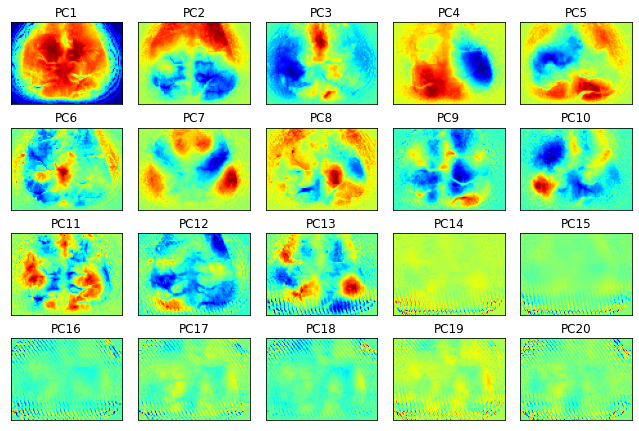

In [ ]:
labels = ['PC' +str(x) for x in range(1,21)]
grid = np.random.rand(4, 4)
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(0,20):
    axs.flat[i].imshow(np.reshape(first40PCA_components_Ca[i], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i])

plt.tight_layout()

plt.savefig("First20PC_Ca.jpg")

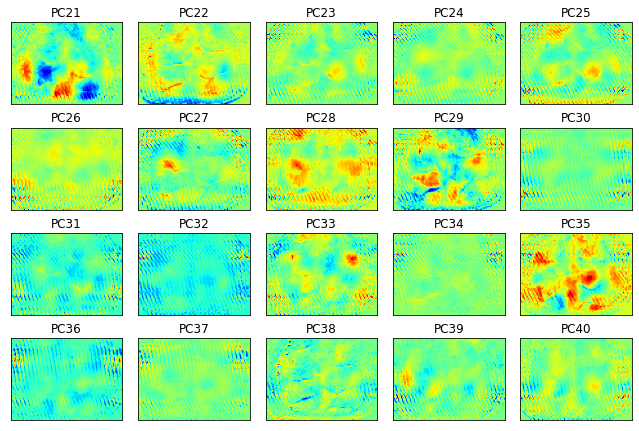

In [ ]:
labels = ['PC' +str(x) for x in range(1,41)]
grid = np.random.rand(4, 4)
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(0,20):
    axs.flat[i].imshow(np.reshape(first40PCA_components_Ca[i+20], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i+20])

plt.tight_layout()

plt.savefig("First21-40PC_Ca.jpg")

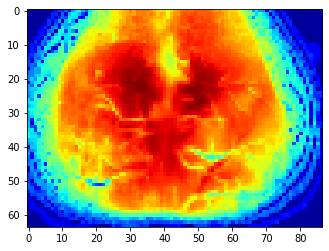

In [ ]:
Comp1 = np.reshape(first40PCA_components_Ca[0], brain_Ca_images[1].shape)
plt.imshow(Comp1, cmap='jet')

Создадим dataframe для ICA

In [ ]:
labels_for_components = ['PC' +str(x) for x in range(1,41)]
firtst40pca_components_df_Ca = pd.DataFrame(first40PCA_components_Ca, index = labels_for_components, columns = names_of_pixels)

In [ ]:
firtst40pca_components_df_Ca.head()

r1c1          r1c2          r1c3          r1c4          r1c5  \
PC1  2.220446e-16 -1.110223e-16 -0.000000e+00 -0.000000e+00 -0.000000e+00   
PC2 -9.575674e-16  8.257284e-16 -3.330669e-16  2.220446e-16 -5.551115e-17   
PC3  8.326673e-17  6.036838e-16 -0.000000e+00 -1.318390e-16  2.775558e-16   
PC4  6.106227e-16  1.249001e-16  1.110223e-16 -3.885781e-16 -3.191891e-16   
PC5  1.595946e-16 -5.169476e-16  4.857226e-17 -1.387779e-16  1.526557e-16   

             r1c6          r1c7          r1c8      r1c9     r1c10  ...  \
PC1  3.388132e-21 -0.000000e+00  8.271806e-25  0.002575  0.003366  ...   
PC2 -0.000000e+00 -0.000000e+00 -0.000000e+00  0.002099  0.002622  ...   
PC3 -3.330669e-16 -2.775558e-17 -0.000000e+00 -0.001663 -0.003406  ...   
PC4  1.110223e-16 -0.000000e+00  1.387779e-17 -0.000317 -0.000983  ...   
PC5 -4.302114e-16 -1.110223e-16 -1.110223e-16  0.003087  0.003337  ...   

     r64c78  r64c79  r64c80  r64c81  r64c82  r64c83  r64c84  r64c85  r64c86  \
PC1    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
PC2    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
PC3    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
PC4    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
PC5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

     r64c87  
PC1    -0.0  
PC2    -0.0  
PC3    -0.0  
PC4    -0.0  
PC5     0.0  

[5 rows x 5568 columns]

# ICA with jadeR _Ca

In [ ]:
import jadeR_NL
from jadeR_NL import jadeR_NL
from numpy import abs, append, arange, arctan2, argsort, array, concatenate, \
    cos, diag, dot, eye, float64, loadtxt, matrix, multiply, ndarray, \
    savetxt, sign, sin, sqrt, zeros

In [ ]:
Result_of_jadeR_for_Ca = np.asarray(jadeR_NL(first40PCA_components_Ca,verbose=True))

jade -> Looking for 40 sources
jade -> Removing the mean value
jade -> Whitening the data
jade -> Estimating cumulant matrices
jade -> Contrast optimization by joint diagonalization
jade -> Sweep #  0
completed in 780 rotations
jade -> Sweep #  1
completed in 780 rotations
jade -> Sweep #  2
completed in 780 rotations
jade -> Sweep #  3
completed in 780 rotations
jade -> Sweep #  4
completed in 780 rotations
jade -> Sweep #  5
completed in 780 rotations
jade -> Sweep #  6
completed in 780 rotations
jade -> Sweep #  7
completed in 780 rotations
jade -> Sweep #  8
completed in 780 rotations
jade -> Sweep #  9
completed in 780 rotations
jade -> Sweep # 10
completed in 780 rotations
jade -> Sweep # 11
completed in 780 rotations
jade -> Sweep # 12
completed in 780 rotations
jade -> Sweep # 13
completed in 780 rotations
jade -> Sweep # 14
completed in 780 rotations
jade -> Sweep # 15
completed in 779 rotations
jade -> Sweep # 16
completed in 780 rotations
jade -> Sweep # 17
completed in 779 

In [ ]:
Result_of_jadeR_for_Ca.shape

(40, 40)

In [ ]:
ModelICA_Ca = np.dot(Result_of_jadeR_for_Ca, first40PCA_components_Ca)

In [ ]:
saveImgs(ModelICA_Ca, experiment = experiment,  save_name = 'ICA_comp_Ca', directory= dir_for_result)

Картинка с независимыми компонентами

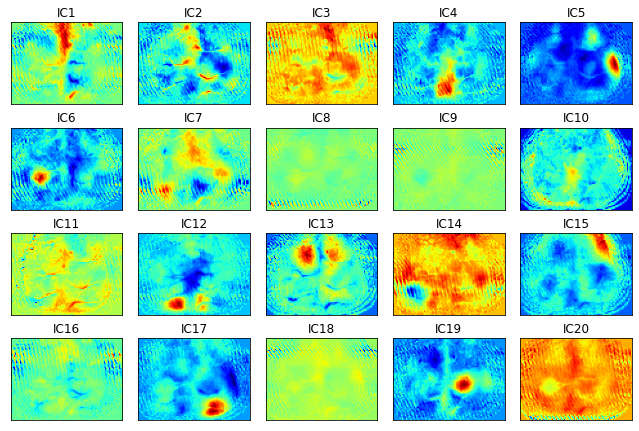

In [ ]:
labels = ['IC' +str(x) for x in range(1,40)]

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for i in range(0,20):
    axs.flat[i].imshow(np.reshape(ModelICA_Ca[i], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i])

plt.tight_layout()

plt.savefig("First20IC_Ca.jpg")

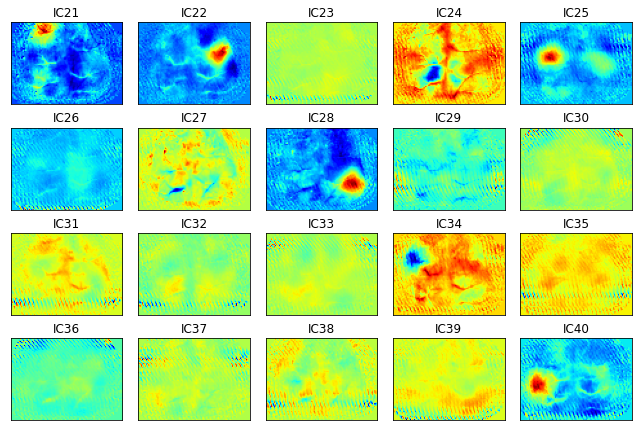

In [ ]:
labels = ['IC' +str(x) for x in range(1,41)]

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for i in range(0,20):
    axs.flat[i].imshow(np.reshape(ModelICA_Ca[i+20], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i+20])

plt.tight_layout()

plt.savefig("First21-40IC_Ca.jpg")

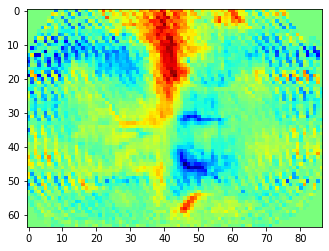

In [ ]:
ica_Comp1 = np.reshape(ModelICA_Ca[0], brain_Ca_images[1].shape)
plt.imshow(ica_Comp1, cmap='jet')

In [ ]:
A_Ca = Result_of_jadeR_for_Ca.transpose()

In [ ]:
Score_All_Ca = pca_data_Ca[:,:40].transpose()

In [ ]:
Score_All_Ca.shape

(40, 4400)

In [ ]:
Score_ICA_all_Ca = np.asarray(np.dot(A_Ca, Score_All_Ca))

In [ ]:
pd_score_ica_all_Ca = pd.DataFrame(Score_ICA_all_Ca, index = ['ICA' +str(x) for x in range(1,41)], columns = names_of_frames)

In [ ]:
pd_score_ica_all_Ca.head()

frame1      frame2       frame3       frame4       frame5  \
ICA1  -49.610391 -106.129549  -325.521915  -520.912301  -707.406956   
ICA2 -401.674273  -75.232836  -183.597073  -384.176010  -797.526265   
ICA3  568.640754  669.346630  1050.486115  1538.326156  2151.416593   
ICA4  127.279457   27.490155   107.575582   333.433898   345.574802   
ICA5   82.959453  -90.982034   294.922990  -133.962638   335.942289   

           frame6       frame7       frame8       frame9      frame10  ...  \
ICA1 -1077.235423  -635.152791  -511.336556  -602.982866  -204.032238  ...   
ICA2  -850.278113 -1071.327822  -648.384327  -499.068019  -494.146876  ...   
ICA3  1950.371122  2195.064663  1772.532699  1920.394010  1980.015219  ...   
ICA4    19.509288   375.314771   195.830449   388.674692   551.043500  ...   
ICA5   241.069635   364.305149   697.039154    78.382299  -337.278278  ...   

       frame4391   frame4392   frame4393   frame4394    frame4395   frame4396  \
ICA1 -615.828936 -866.852666 -307.151098  187.679007 -1090.912348 -606.839469   
ICA2  221.980600   44.291840 -279.000852 -225.620804  -426.791338 -386.256527   
ICA3 -120.118458  -91.902226 -429.448526  -15.009851  -175.663320  254.986516   
ICA4   24.504671   -9.767314  284.599365 -284.600562    44.594176  -94.223823   
ICA5  275.704436  199.077578  206.008496  269.576615   121.390463  539.372555   

       frame4397   frame4398    frame4399   frame4400  
ICA1 -271.873446  869.415898  1498.434075  917.718163  
ICA2  143.293643   34.832252   312.778031   -1.272088  
ICA3  -83.715966   -3.219406  -312.483197 -125.562873  
ICA4  -65.493414   63.150866  -215.105593  -87.654669  
ICA5  607.201114  365.491212   329.807175  805.644989  

[5 rows x 4400 columns]

# PCA _Hem

In [ ]:
scaler_Hem = preprocessing.StandardScaler().fit(Raw_flatten_data_Hem)
scaled_data_Hem = scaler_Hem.transform(Raw_flatten_data_Hem)
pca_Hem = PCA()
pca_Hem.fit(scaled_data_Hem)
pca_data_Hem = pca_Hem.transform(scaled_data_Hem)

Построим Scree Plot

In [ ]:
'''per_var_Hem = np.round(pca_Hem.explained_variance_ratio_*100, decimals=1)
labels = ['PC' +str(x) for x in range(1,len(per_var_Hem)+1)]

plt.bar(x=range(1,len(per_var_Hem)+1), height=per_var_Hem, tick_label=labels)
plt.ylabel('Percentage of Explaind Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot for Hem images')
plt.show()'''

"per_var_Hem = np.round(pca_Hem.explained_variance_ratio_*100, decimals=1)\nlabels = ['PC' +str(x) for x in range(1,len(per_var_Hem)+1)]\n\nplt.bar(x=range(1,len(per_var_Hem)+1), height=per_var_Hem, tick_label=labels)\nplt.ylabel('Percentage of Explaind Variance')\nplt.xlabel('Principal Component')\nplt.title('Scree Plot for Hem images')\nplt.show()"

In [ ]:
per_var_Hem = np.round(pca_Hem.explained_variance_ratio_*100, decimals=1)

In [ ]:
print(f'Первые 40 главных компонент объясняют {sum(per_var_Hem[:40])}% разброса данных ')

Первые 40 главных компонент объясняют 51.60000000000004% разброса данных 


In [ ]:
first40PCA_components_Hem = pca_Hem.components_[:40,]

In [ ]:
first40PCA_components_Hem.shape

(40, 5568)

Создание функции для сохранения изображений

In [ ]:
saveImgs(first40PCA_components_Hem, experiment =experiment, save_name = 'PCA_comp_Hem', directory=dir_for_result)

Картинка с главными компонентами

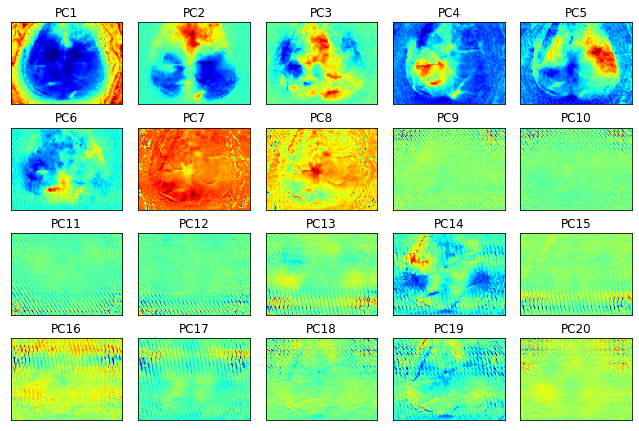

In [ ]:
labels = ['PC' +str(x) for x in range(1,21)]
grid = np.random.rand(4, 4)
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(0,20):
    axs.flat[i].imshow(np.reshape(first40PCA_components_Hem[i], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i])

plt.tight_layout()

plt.savefig("First20PC_Hem.jpg")

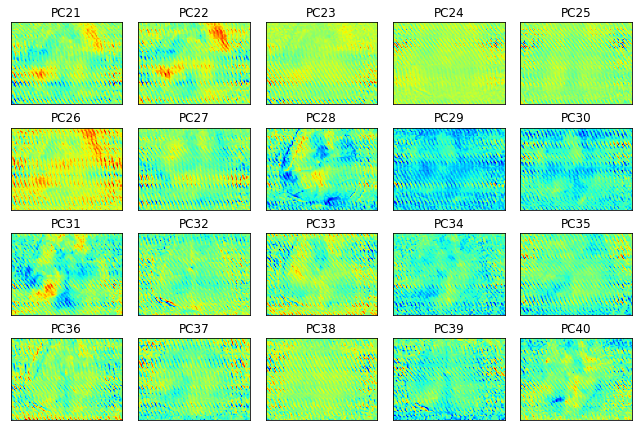

In [ ]:
labels = ['PC' +str(x) for x in range(1,41)]
grid = np.random.rand(4, 4)
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(0,20):
    axs.flat[i].imshow(np.reshape(first40PCA_components_Hem[i+20], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i+20])

plt.tight_layout()

plt.savefig("First21-40PC_Hem.jpg")

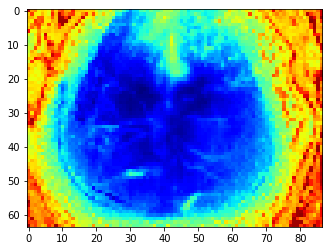

In [ ]:
Comp1 = np.reshape(first40PCA_components_Hem[0], brain_Ca_images[1].shape)
plt.imshow(Comp1, cmap='jet')

Создадим dataframe для ICA

In [ ]:
labels_for_components = ['PC' +str(x) for x in range(1,41)]
firtst40pca_components_df_Hem = pd.DataFrame(first40PCA_components_Hem, index = labels_for_components, columns = names_of_pixels)

In [ ]:
firtst40pca_components_df_Hem.head()

r1c1      r1c2      r1c3      r1c4      r1c5      r1c6      r1c7  \
PC1 -0.000472 -0.004912 -0.004390 -0.006833 -0.006183 -0.006618 -0.007098   
PC2 -0.000305 -0.000168  0.000917  0.001137  0.000213 -0.000765  0.000423   
PC3  0.000579 -0.003732 -0.002221 -0.001702 -0.003314 -0.003556 -0.005477   
PC4 -0.006809 -0.009849 -0.008152 -0.010774 -0.013497 -0.014333 -0.009299   
PC5 -0.001811 -0.008101 -0.013957 -0.012365 -0.008603 -0.015674 -0.013657   

         r1c8      r1c9     r1c10  ...    r64c78  r64c79  r64c80    r64c81  \
PC1 -0.003578 -0.005960 -0.003286  ... -0.000463     0.0     0.0 -0.002439   
PC2  0.001554  0.000928  0.000676  ... -0.000145    -0.0    -0.0 -0.000530   
PC3 -0.002618 -0.000835 -0.000474  ... -0.000026    -0.0    -0.0 -0.002024   
PC4 -0.009559 -0.007966 -0.003250  ...  0.001415     0.0     0.0 -0.002239   
PC5 -0.004914 -0.016302 -0.005742  ...  0.000228    -0.0    -0.0 -0.002259   

       r64c82    r64c83    r64c84    r64c85    r64c86    r64c87  
PC1 -0.000983 -0.002052 -0.003134  0.000649 -0.001250 -0.002889  
PC2 -0.000467  0.001747  0.000647 -0.000419 -0.000297  0.000395  
PC3 -0.001793 -0.001021 -0.000367  0.003346 -0.000675 -0.003217  
PC4 -0.001079 -0.005869 -0.010714 -0.002603 -0.005526 -0.007487  
PC5 -0.001140 -0.008148 -0.006928 -0.007901 -0.009841 -0.013844  

[5 rows x 5568 columns]

# ICA with jadeR _Hem

In [ ]:
import jadeR_NL
from jadeR_NL import jadeR_NL
from numpy import abs, append, arange, arctan2, argsort, array, concatenate, \
    cos, diag, dot, eye, float64, loadtxt, matrix, multiply, ndarray, \
    savetxt, sign, sin, sqrt, zeros

In [ ]:
Result_of_jadeR_for_Hem = np.asarray(jadeR_NL(first40PCA_components_Hem,verbose=True))

jade -> Looking for 40 sources
jade -> Removing the mean value
jade -> Whitening the data
jade -> Estimating cumulant matrices


/content/jadeR_NL.py:205: ComplexWarning: Casting complex values to real discards the imaginary part
  CM[:,Range] = Qij
/content/jadeR_NL.py:211: ComplexWarning: Casting complex values to real discards the imaginary part
  CM[:,Range]	= Qij


jade -> Contrast optimization by joint diagonalization
jade -> Sweep #  0
completed in 780 rotations
jade -> Sweep #  1
completed in 780 rotations
jade -> Sweep #  2
completed in 780 rotations
jade -> Sweep #  3
completed in 780 rotations
jade -> Sweep #  4
completed in 780 rotations
jade -> Sweep #  5
completed in 779 rotations
jade -> Sweep #  6
completed in 780 rotations
jade -> Sweep #  7
completed in 778 rotations
jade -> Sweep #  8
completed in 761 rotations
jade -> Sweep #  9
completed in 748 rotations
jade -> Sweep # 10
completed in 741 rotations
jade -> Sweep # 11
completed in 740 rotations
jade -> Sweep # 12
completed in 741 rotations
jade -> Sweep # 13
completed in 740 rotations
jade -> Sweep # 14
completed in 741 rotations
jade -> Sweep # 15
completed in 740 rotations
jade -> Sweep # 16
completed in 741 rotations
jade -> Sweep # 17
completed in 741 rotations
jade -> Sweep # 18
completed in 739 rotations
jade -> Sweep # 19
completed in 741 rotations
jade -> Sweep # 20
comple

/content/jadeR_NL.py:320: ComplexWarning: Casting complex values to real discards the imaginary part
  return B.astype(origtype)


In [ ]:
Result_of_jadeR_for_Hem.shape

(40, 40)

In [ ]:
ModelICA_Hem = np.dot(Result_of_jadeR_for_Hem, first40PCA_components_Hem)

In [ ]:
saveImgs(ModelICA_Hem, experiment = experiment, save_name = 'ICA_comp_Hem', directory=dir_for_result)

Картинка с независимыми компонентами

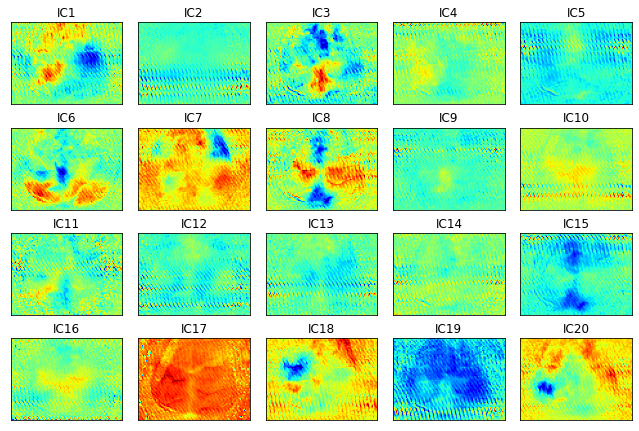

In [ ]:
labels = ['IC' +str(x) for x in range(1,41)]

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for i in range(0,20):
    axs.flat[i].imshow(np.reshape(ModelICA_Hem[i], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i])

plt.tight_layout()

plt.savefig("First20IC_Hem.jpg")

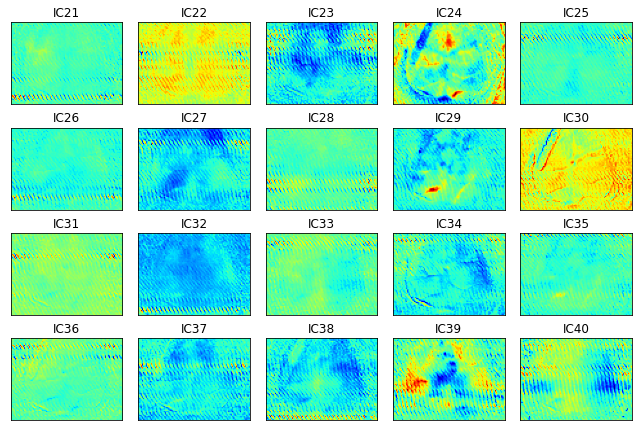

In [ ]:
labels = ['IC' +str(x) for x in range(1,41)]

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for i in range(0,20):
    axs.flat[i].imshow(np.reshape(ModelICA_Hem[i+20], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i+20])

plt.tight_layout()

plt.savefig("First21-40IC_Hem.jpg")

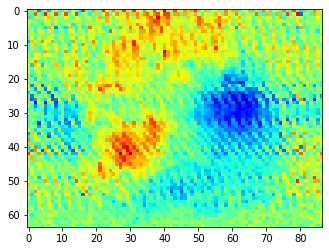

In [ ]:
ica_Comp1 = np.reshape(ModelICA_Hem[0], brain_Ca_images[1].shape)
plt.imshow(ica_Comp1, cmap='jet')

# CR_Reconstruction _Ca

In [ ]:
Mode_Selected = [i for i in range (0,40)]
Mode_Selected.remove(0)
Mode_Selected.remove(5)
Mode_Selected.remove(7)

In [ ]:
Mode_Selected

[1,
 2,
 3,
 4,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [ ]:
RecICA_Sum_Ca = np.dot(Score_ICA_all_Ca[Mode_Selected,:].transpose(),first40PCA_components_Ca[Mode_Selected,:])

In [ ]:
RecICA_Sum_Ca.shape

(4400, 5568)

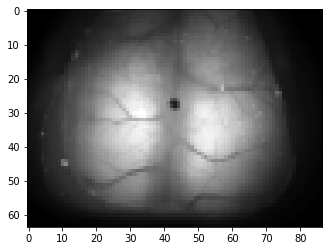

In [ ]:
img_before_Ca= np.reshape(flatten_brain_Ca_images[1], brain_Ca_images[1].shape)
plt.imshow(img_before_Ca, cmap='gray')

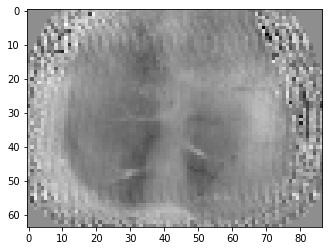

In [ ]:
img_rec_Ca= np.reshape(RecICA_Sum_Ca[1], brain_Ca_images[1].shape)
plt.imshow(img_rec_Ca, cmap='gray')

In [ ]:
os.getcwd ()

'/content/drive/MyDrive/WFI_data/PT_2022/PCA_ICA_Results/Before_PT-Rest_state-m4_Results'

In [ ]:
saveImgs(RecICA_Sum_Ca, experiment = experiment, save_name = 'RE_Ca_wo_Hem', directory = dir_for_result)

In [ ]:
import jadeR_NL
from jadeR_NL import jadeR_NL
from numpy import abs, append, arange, arctan2, argsort, array, concatenate, \
    cos, diag, dot, eye, float64, loadtxt, matrix, multiply, ndarray, \
    savetxt, sign, sin, sqrt, zeros

In [ ]:
Result_of_jadeR_for_Hem = np.asarray(jadeR_NL(first40PCA_components_Hem,verbose=True))

jade -> Looking for 40 sources
jade -> Removing the mean value
jade -> Whitening the data
jade -> Estimating cumulant matrices
jade -> Contrast optimization by joint diagonalization
jade -> Sweep #  0
completed in 780 rotations
jade -> Sweep #  1
completed in 780 rotations
jade -> Sweep #  2
completed in 780 rotations
jade -> Sweep #  3
completed in 780 rotations
jade -> Sweep #  4
completed in 780 rotations
jade -> Sweep #  5
completed in 780 rotations
jade -> Sweep #  6
completed in 780 rotations
jade -> Sweep #  7
completed in 780 rotations
jade -> Sweep #  8
completed in 780 rotations
jade -> Sweep #  9
completed in 780 rotations
jade -> Sweep # 10
completed in 780 rotations
jade -> Sweep # 11
completed in 780 rotations
jade -> Sweep # 12
completed in 780 rotations
jade -> Sweep # 13
completed in 780 rotations
jade -> Sweep # 14
completed in 780 rotations
jade -> Sweep # 15
completed in 780 rotations
jade -> Sweep # 16
completed in 780 rotations
jade -> Sweep # 17
completed in 780 

In [ ]:
Result_of_jadeR_for_Hem.shape

(40, 40)

In [ ]:
ModelICA_Hem = np.dot(Result_of_jadeR_for_Hem, first40PCA_components_Hem)

In [ ]:
saveImgs(ModelICA_Hem, experiment = experiment, save_name = 'ICA_comp_Hem', directory=dir_for_result)

Картинка с независимыми компонентами

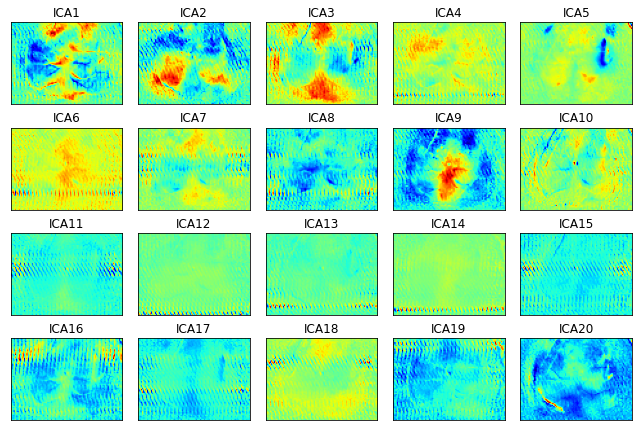

In [ ]:
labels = ['ICA' +str(x) for x in range(1,40)]

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for i in range(0,20):
    axs.flat[i].imshow(np.reshape(ModelICA_Hem[i], brain_Ca_images[1].shape), cmap='jet')
    axs.flat[i].set_title(labels[i])

plt.tight_layout()

plt.savefig("First20ICA_Hem.jpg")

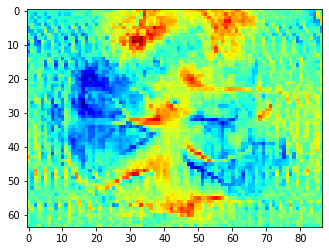

In [ ]:
ica_Comp1 = np.reshape(ModelICA_Hem[0], brain_Ca_images[1].shape)
plt.imshow(ica_Comp1, cmap='jet')